#### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#### Data Collection and Data Processing

In [4]:
wine_df = pd.read_csv("../data/WineQT.csv", header="infer")
wine_df = wine_df.drop(columns="Id", axis=1)   

In [5]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Check for NULL values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Check for duplicates
wine_df.duplicated().sum()

125

In [9]:
# Drop Duplicates
wine_df = wine_df.drop_duplicates()

In [12]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,8.288507,0.533541,0.268802,2.524411,0.087187,15.648821,46.325639,0.996700,3.311503,0.656817,10.452456,5.641454
std,1.741324,0.183167,0.196229,1.314850,0.048506,10.176525,33.123533,0.001916,0.157775,0.167542,1.095064,0.811744
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995572,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,38.000000,0.996665,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.645000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997827,3.400000,0.720000,11.200000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
wine_df['quality'].value_counts()

quality
5    433
6    409
7    122
4     33
8     15
3      6
Name: count, dtype: int64

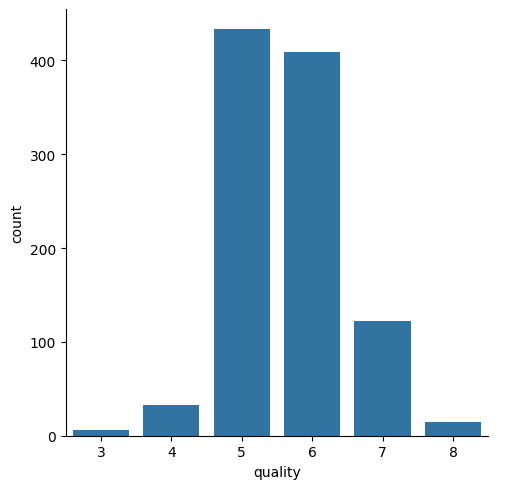

In [14]:
# Bar chart for value count of Quality
sns.catplot(x='quality', data=wine_df, kind='count')

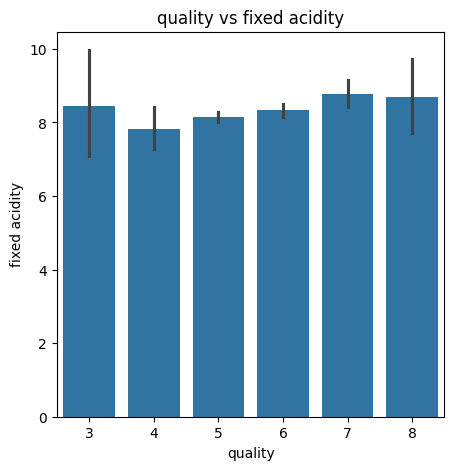

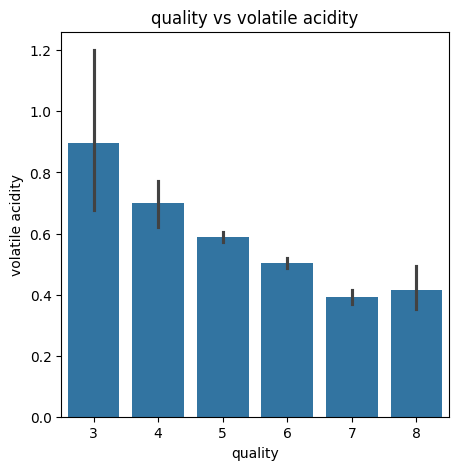

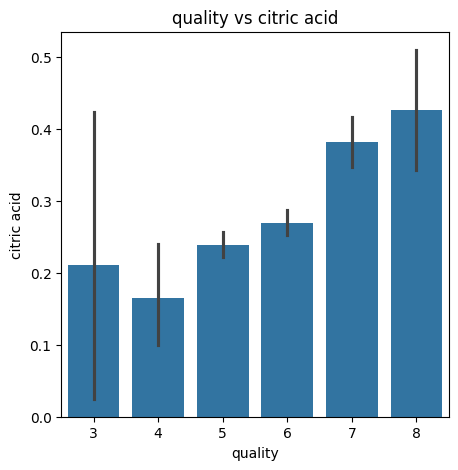

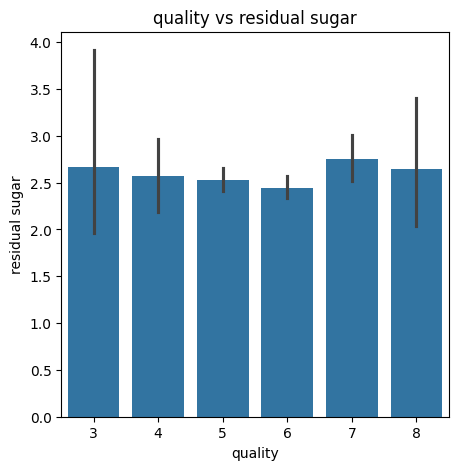

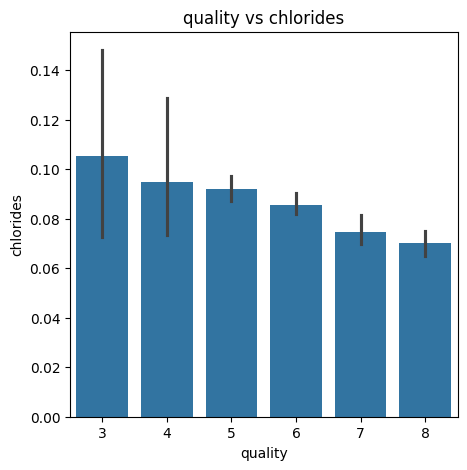

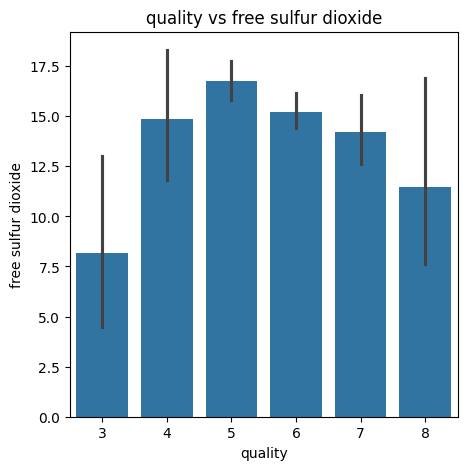

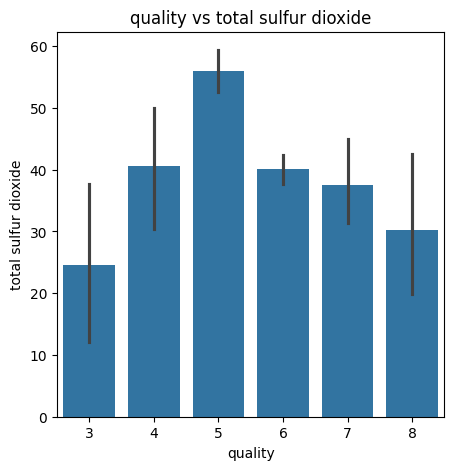

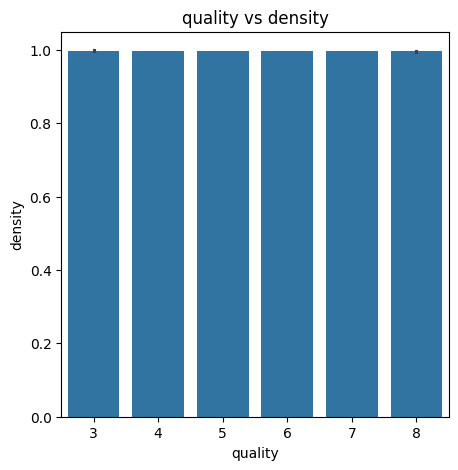

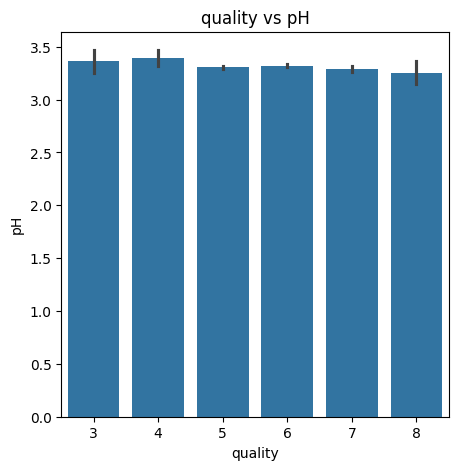

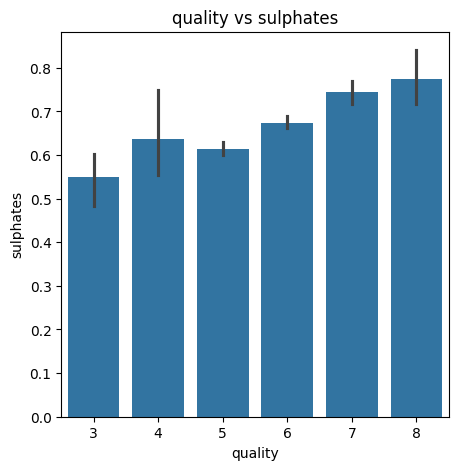

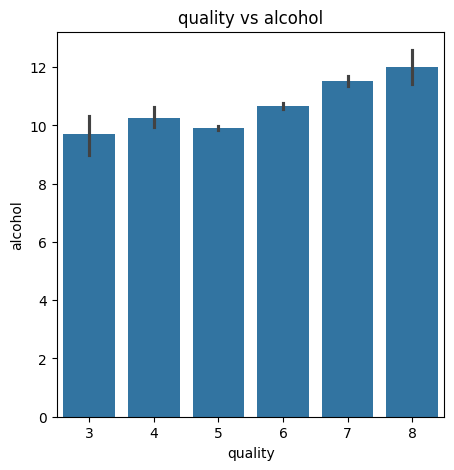

In [22]:
# Barplot for Features vs Target

for col in wine_df.columns:
    if col != 'quality':
        plt.figure(figsize=(5,5))
        sns.barplot(x='quality',y=col, data=wine_df)
        plt.title(f"quality vs {col}")

<Axes: >

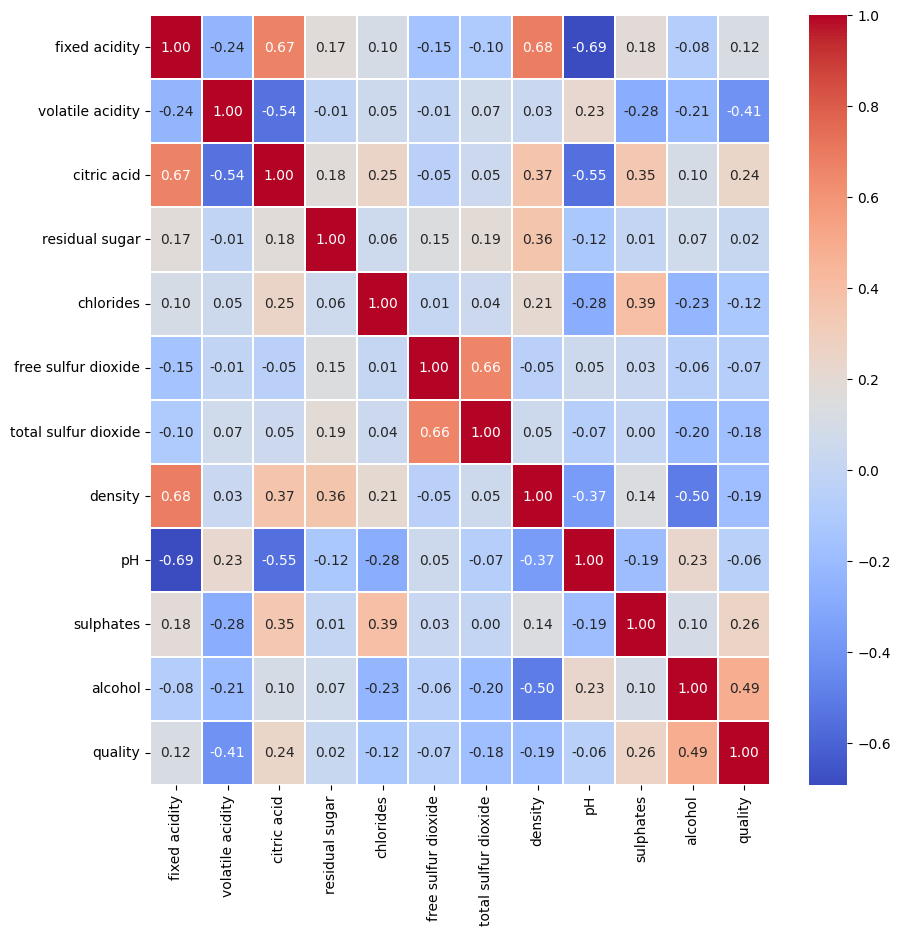

In [23]:
# Heatmap for correlation
plt.figure(figsize=(10,10))
sns.heatmap(wine_df.corr(),annot=True,fmt='0.2f',cmap='coolwarm',linewidths=0.1)

#### Data Preprocessing for Model Training

In [64]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

target = 'quality'


In [65]:
X = wine_df[features]
# Label N=Binarization for Y
Y = wine_df[target].apply(lambda y : 1 if y>=7 else 0)

In [66]:
print(X.shape,Y.shape)

(1018, 11) (1018,)


In [67]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [68]:
Y.value_counts()

quality
0    881
1    137
Name: count, dtype: int64

#### Split data for Training and Test

In [69]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [70]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(814, 11) (814,) (204, 11) (204,)


#### Model Training

In [77]:
model = RandomForestClassifier()

In [78]:
model.fit(X_train,Y_train)

RandomForestClassifier()

#### Model Evaluation

In [79]:
# Training set accuracy
Y_training_pred = model.predict(X_train)
training_accuracy = accuracy_score(Y_training_pred,Y_train)
print(f"Training Accuracy : {training_accuracy}")

Training Accuracy : 1.0


In [80]:
# Test set accuracy
Y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test_pred,Y_test)
print(f"Test Accuracy : {test_accuracy}")

Test Accuracy : 0.8970588235294118


#### Predictive System

In [83]:
input_data = np.array((7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8)).reshape(1,-1)
pred = model.predict(input_data)

print("Good" if pred == 1 else "Bad")

Good


/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
